<a href="https://colab.research.google.com/github/Paolatae2505/Practicas-AA/blob/master/Examen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXAMEN 3
Vargas Bravo Paola 318074755

Illescas Coria Janet

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Punto 1

In [2]:
X  = pd.read_csv('train.csv')

In [3]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
X_num = X.select_dtypes(include=['number'])

In [5]:
X_num = X_num.fillna(X_num.mean())

In [6]:
Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((X_num < lower_bound) | (X_num > upper_bound)).any(axis=1)
if outliers.any():
    print("Datos atípicos encontrados:")
    print(X_num[outliers])
    X_num = X_num[~outliers]
else:
    print("No se encontraron datos atípicos.")

Datos atípicos encontrados:
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         

In [7]:
X_num

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1
12,0.278457,-0.020415,-0.112732,-0.999135,-0.984680,-0.996274,-0.999077,-0.982937,-0.996410,-0.943906,...,-0.686389,-0.878751,-0.077552,-0.101222,0.639084,0.765485,-0.850654,0.187611,-0.035998,1
17,0.280135,-0.013917,-0.106370,-0.997695,-0.987516,-0.990407,-0.998014,-0.987954,-0.992190,-0.942076,...,-0.328899,-0.596861,-0.028332,0.092367,-0.822239,0.367557,-0.759363,0.264033,0.029664,1
21,0.277152,-0.017983,-0.106601,-0.997763,-0.989957,-0.996586,-0.998291,-0.989669,-0.996700,-0.941472,...,-0.848198,-0.950247,-0.002320,0.150391,0.142331,-0.853711,-0.762023,0.262170,0.029987,1
35,0.270908,-0.014413,-0.106522,-0.993856,-0.993179,-0.993470,-0.993878,-0.992131,-0.992788,-0.941617,...,-0.430744,-0.823181,0.064398,0.300924,0.117655,-0.046455,-0.316732,-0.217729,-0.323329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,0.278204,-0.016106,-0.110522,-0.999717,-0.992924,-0.986699,-0.999616,-0.991570,-0.985084,-0.942852,...,-0.541634,-0.831776,0.050746,0.225696,0.211738,0.175778,-0.768507,0.129963,-0.146586,30
7026,0.278151,-0.015879,-0.112355,-0.998946,-0.990229,-0.987594,-0.999126,-0.989396,-0.985982,-0.942852,...,-0.577362,-0.836086,0.098523,0.866288,-0.126262,0.056808,-0.769274,0.129801,-0.146061,30
7027,0.277028,-0.017123,-0.111366,-0.997856,-0.992382,-0.987840,-0.997916,-0.992066,-0.986415,-0.944808,...,-0.812395,-0.936835,0.221331,-0.127942,0.128167,-0.097097,-0.770677,0.129276,-0.145152,30
7217,0.279277,-0.013380,-0.106030,-0.995466,-0.989060,-0.991667,-0.995922,-0.989787,-0.991401,-0.936897,...,-0.575823,-0.820962,-0.161015,0.182354,-0.447696,0.001221,-0.743932,0.088252,-0.167836,30


In [8]:
import numpy as np

means = X_num.mean()
stds = X_num.std()

print("Media de cada característica:")
print(means)
print("\nDesviación estándar de cada característica:")
print(stds)


Media de cada característica:
tBodyAcc-mean()-X                        0.277566
tBodyAcc-mean()-Y                       -0.017271
tBodyAcc-mean()-Z                       -0.109126
tBodyAcc-std()-X                        -0.992822
tBodyAcc-std()-Y                        -0.969633
                                          ...    
angle(tBodyGyroJerkMean,gravityMean)     0.031177
angle(X,gravityMean)                    -0.751539
angle(Y,gravityMean)                     0.148276
angle(Z,gravityMean)                     0.010899
subject                                 18.524950
Length: 562, dtype: float64

Desviación estándar de cada característica:
tBodyAcc-mean()-X                       0.005218
tBodyAcc-mean()-Y                       0.005515
tBodyAcc-mean()-Z                       0.011435
tBodyAcc-std()-X                        0.008293
tBodyAcc-std()-Y                        0.032156
                                          ...   
angle(tBodyGyroJerkMean,gravityMean)    0.489071
angl

#Paso 2

In [10]:
pca = PCA()
pca = pca.fit(X_num)

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

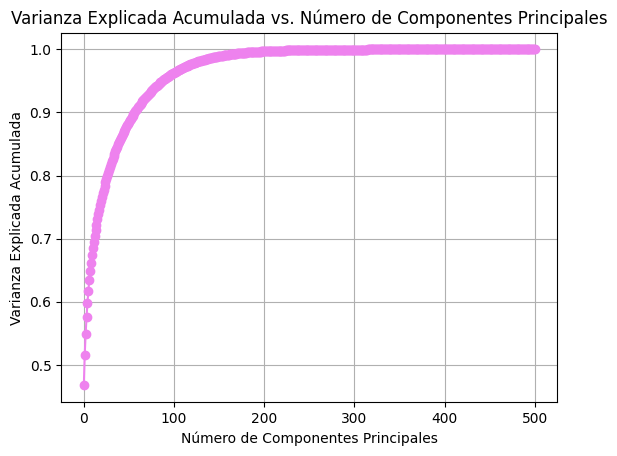

In [12]:
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color = 'violet')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

In [13]:
explained_variance_ratio

array([4.67323301e-01, 4.83779840e-02, 3.31330354e-02, 2.63113612e-02,
       2.27345535e-02, 1.95148040e-02, 1.73548017e-02, 1.45728525e-02,
       1.24488939e-02, 1.21762616e-02, 1.08851196e-02, 1.03492578e-02,
       9.44201355e-03, 8.96759767e-03, 8.67575271e-03, 8.31928995e-03,
       8.02200069e-03, 7.54310960e-03, 6.94343775e-03, 6.55184850e-03,
       6.28838091e-03, 6.07688384e-03, 5.89120179e-03, 5.67925893e-03,
       5.53966157e-03, 5.24586280e-03, 5.13479135e-03, 4.95350060e-03,
       4.79857993e-03, 4.59084290e-03, 4.37860434e-03, 4.25028291e-03,
       4.15134493e-03, 4.00602324e-03, 3.92799705e-03, 3.84939642e-03,
       3.70354419e-03, 3.59692102e-03, 3.57589792e-03, 3.39166558e-03,
       3.31847910e-03, 3.27463178e-03, 3.15380704e-03, 3.06236534e-03,
       2.99699090e-03, 2.94346964e-03, 2.87073719e-03, 2.78530009e-03,
       2.73951921e-03, 2.68603279e-03, 2.57973043e-03, 2.54347584e-03,
       2.52089857e-03, 2.40808890e-03, 2.38265988e-03, 2.33205832e-03,
      

In [14]:
cumulative_variance_ratio

array([0.4673233 , 0.51570129, 0.54883432, 0.57514568, 0.59788024,
       0.61739504, 0.63474984, 0.64932269, 0.66177159, 0.67394785,
       0.68483297, 0.69518223, 0.70462424, 0.71359184, 0.72226759,
       0.73058688, 0.73860888, 0.74615199, 0.75309543, 0.75964728,
       0.76593566, 0.77201254, 0.77790374, 0.783583  , 0.78912266,
       0.79436853, 0.79950332, 0.80445682, 0.8092554 , 0.81384624,
       0.81822485, 0.82247513, 0.82662647, 0.8306325 , 0.83456049,
       0.83840989, 0.84211343, 0.84571036, 0.84928625, 0.85267792,
       0.8559964 , 0.85927103, 0.86242484, 0.8654872 , 0.86848419,
       0.87142766, 0.8742984 , 0.8770837 , 0.87982322, 0.88250925,
       0.88508898, 0.88763246, 0.89015336, 0.89256145, 0.89494411,
       0.89727616, 0.89955414, 0.90174246, 0.90391091, 0.90605983,
       0.90815868, 0.91016056, 0.91215574, 0.91411401, 0.91602732,
       0.91786019, 0.91968815, 0.92145305, 0.92318225, 0.92489099,
       0.9265442 , 0.92818172, 0.92976011, 0.93129338, 0.93280

In [15]:
desired_variance_ratio = 0.90
num_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

In [16]:
print(f"Número de componentes principales para retener {desired_variance_ratio * 100}% de la varianza total: {num_components}")

Número de componentes principales para retener 90.0% de la varianza total: 58


In [17]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_num)

In [18]:
X_pca

array([[-4.85764861e+00,  3.94029074e-03, -2.83391660e-01, ...,
         1.29107564e+00, -3.08442084e-01, -1.47850774e+00],
       [-1.28253998e+01,  4.95047051e+00,  2.43677079e-01, ...,
        -2.90364763e-01, -4.36562214e-01,  1.22227070e+00],
       [-9.30255242e+00, -8.63454316e-01,  1.35973441e+00, ...,
        -1.41169532e+00, -3.77112119e-01,  8.35663150e-01],
       ...,
       [-1.27264873e+01,  2.09268377e+00,  2.21389107e+00, ...,
        -9.47078804e-01,  6.87419597e-01,  6.71086937e-01],
       [-1.02484083e+01,  3.15305267e+00,  4.49723967e-01, ...,
        -5.70234075e-01,  7.31931430e-01, -3.60724611e-01],
       [-1.30661482e+00, -4.23670823e+00,  3.21470115e+00, ...,
        -1.06433546e+00, -2.92504562e-01, -1.56617808e+00]])

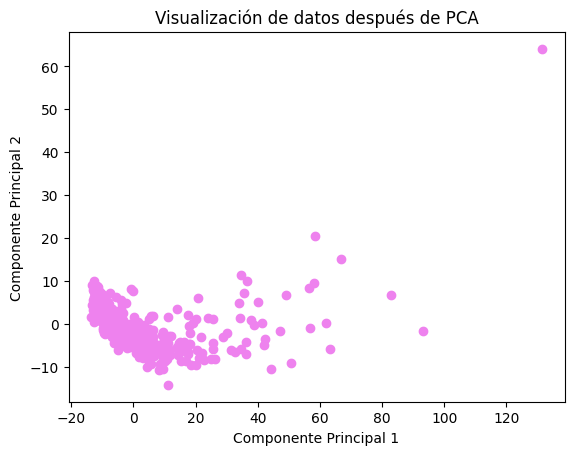

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='violet')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de datos después de PCA')

plt.show()

In [ ]:
import seaborn as sns


pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

sns.pairplot(pca_df)

plt.suptitle('Pair Plot de las Componentes Principales', y=1.02)
plt.show()


KeyboardInterrupt: 

In [ ]:
from scipy import stats

def plot_histograms(df):
    df.hist(bins=30, figsize=(5,5), color='violet')
    plt.suptitle('Histograms of Features', fontsize=20)
    plt.show()

def plot_qqplots(df):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(5, 4, i)
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle('Q-Q Plots of Features', fontsize=20)
    plt.subplots_adjust(top=0.95)
    plt.show()

def normality_tests(df):
    normality_results = {}
    for column in df.columns:
        stat, p_value = stats.shapiro(df[column].dropna())
        normality_results[column] = p_value
    return normality_results



In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(X_pca):
    num_features = X_pca.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

    for i in range(num_features):
        axes[i].hist(X_pca[:, i], bins=30, color='violet')
        axes[i].set_title(f'Componente {i+1}')

    plt.suptitle('Histogramas de Componentes', fontsize=20)
    plt.show()

plot_histograms(X_pca)

In [ ]:
from scipy.stats import shapiro

def check_normality(X_pca):
    normality_results = {}
    for i in range(X_pca.shape[1]):
        feature = X_pca[:, i]
        _, p_value = shapiro(feature)
        normality_results[f'Componente {i+1}'] = p_value
    return normality_results

normality_results = check_normality(X_pca)
for feature, p_value in normality_results.items():
    if p_value < 0.05:
        print(f'{feature} no sigue una distribución normal (p < 0.05)')
    else:
        print(f'{feature} sigue una distribución normal (p >= 0.05)')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_density_variation(X_pca):
    density_variation = False
    num_features = X_pca.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

    for i in range(num_features):
        feature = X_pca[:, i]
        sns.kdeplot(feature, ax=axes[i], color='violet', fill=True)
        axes[i].set_title(f'Componente {i+1}')

        if i > 0:
            prev_density = sns.kdeplot(X_pca[:, i-1], color='purple', fill=False, ax=axes[i])
            curr_density = sns.kdeplot(feature, color='violet', fill=False, ax=axes[i])
            if prev_density.get_lines()[0].get_data()[1].max() != curr_density.get_lines()[0].get_data()[1].max():
                density_variation = True

    fig.suptitle('Gráficos de Densidad de Componentes', fontsize=16)
    plt.tight_layout()
    plt.show()

    if density_variation:
        print("Hay variabilidad en la densidad entre las dimensiones.")
    else:
        print("No hay variabilidad en la densidad entre las dimensiones.")

check_density_variation(X_pca)


##  Justifica la eleccion de la cantidad de dimensiones resultantes basandote en la variabilidad explicada y la importancia de las caracterısticas para el analisis de los datos.


Primero, para poder obtener el número de dimensiones, utilizamos el código de la celda 13, diseñado para determinar cuántos componentes principales se necesitan para retener al menos el 90% de la varianza total en un análisis de componentes principales (PCA). Definimos la proporción de varianza deseada como 0.90. Luego, utilizamos np.argmax en un array llamado cumulative_variance_ratio, que contiene los valores acumulativos de la varianza explicada por cada componente principal. La función np.argmax encuentra el primer índice donde el valor en cumulative_variance_ratio es mayor o igual a 0.90. Este índice, más uno, nos da el número de componentes principales necesarios para alcanzar al menos el 90% de la varianza.

Usamos un umbral de varianza del 90%, lo que significa que estamos manteniendo la mayor parte de la información relevante mientras reducimos la dimensionalidad. Generalmente, esto resulta en una reducción significativa del número de componentes, lo que simplifica el análisis y permite que los algoritmos de clustering funcionen de manera más eficiente. Queremos conservar la información del conjunto de datos original para asegurar que el clustering funcione bien al formar los clusters. Mantener el 90% de la varianza garantiza que preservamos suficiente información sin sacrificar la complejidad computacional, haciendo que esta elección sea óptima para nuestros propósitos.


En el contexto del clustering, la importancia de las características sigue siendo fundamental, ya que influyen en la capacidad del algoritmo para identificar y agrupar patrones similares en los datos. Las características relevantes permiten que el algoritmo de clustering encuentre estructuras significativas en el conjunto de datos, lo que facilita la formación de grupos coherentes y distintivos. Por ejemplo, en el conjunto de datos de "Human Activity Recognition with Smartphones", las características derivadas de las señales de sensores pueden ayudar a distinguir entre diferentes actividades físicas, lo que a su vez puede conducir a una agrupación más precisa de los registros de datos en función de la actividad realizada.
Seleccionar las características adecuadas para el clustering es crucial, ya que características irrelevantes o redundantes pueden diluir la señal y dificultar la identificación de patrones claros. Además, las características que capturan aspectos importantes de la variabilidad en los datos pueden mejorar la capacidad del algoritmo para encontrar estructuras significativas y representativas en el espacio de características. Por lo tanto, al realizar clustering, es importante considerar cuidadosamente qué características incluir en el análisis, asegurándose de que reflejen adecuadamente las diferencias y similitudes entre las instancias de datos y faciliten la formación de grupos coherentes y útiles.


# Punto 3 y 4

In [ ]:
num_components = X_pca.shape[1]
num_bins = 20

plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.subplot(num_components, 1, i+1)
    plt.hist(X_pca[:, i], bins=num_bins, color='violet', edgecolor='black')
    plt.title(f'Componente Principal {i+1}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
num_components = X_pca.shape[1]
for i in range(num_components):
    print(f'Componente Principal {i+1}')
    print(X_pca[:, i])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
davies_bouldin_scores = []


for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    davies_bouldin_avg = davies_bouldin_score(X_pca, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

In [ ]:
 wcss

In [ ]:
 silhouette_scores

In [ ]:
davies_bouldin_scores

In [ ]:

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, marker='o', color='violet')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS o SSE

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='violet')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', color='violet')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


## Justifica tu eleccion de tecnica de clustering considerando la estructura de los datos y el tipo de patrones que esperas encontrar.

Ahora bien, vamos a considerar las cuatro ténicas que vimos de clustering, entonces :


*   Aglomerativo (Hierarchical Clustering) : Para ello dado que realizamos PCA,  podemos examinar la varianza explicada por cada componente principal. Hay que verificar si hay una gran diferencia en la varianza explicada entre diferentes componentes principales, esto podría sugerir una estructura jerárquica en los datos.
Entonces , basandonos en la varianza explicada y el PCA, se observa que la primera componente principal explica una proporción significativamente alta de la varianza total en los datos, aproximadamente el 87.12%. Este hallazgo sugiere que una cantidad considerable de información se captura en esta sola dimensión, lo cual es característico en PCA.
Sin embargo, las siguientes componentes principales explican proporciones mucho menores de la varianza. Por ejemplo, la segunda y tercera componentes principales explican alrededor del 2.59% y 1.23% de la varianza, respectivamente. Aunque estas contribuciones son significativas, son considerablemente menores que la primera componente.
Conforme se avanza hacia las componentes principales posteriores, la proporción de varianza explicada disminuye gradualmente. Esto sugiere que no hay una clara jerarquía en la estructura de los datos en términos de la varianza explicada por cada componente principal.
Por lo que mientras que la primera componente principal domina en términos de la varianza explicada, las siguientes componentes explican cantidades mucho menores de varianza. Este patrón es típico en PCA y no necesariamente indica una estructura jerárquica en los datos.
*   Gaussian Mixture Models (GMM) : En este caso dada la celda 21 , tenemos que las componentes no siguen una distribución Gaussiana , entonces si los datos no tienen una distribución gaussiana, los modelos de clustering basados en esa suposición podrían no ser los más apropiados.
Entonces basándonos en la información proporcionada en la celda 21, donde se indica que las componentes no siguen una distribución Gaussiana, podemos concluir que los datos no se ajustan bien a la suposición de una distribución Gaussiana. En el contexto de los modelos de mezcla gaussiana (GMM), esta suposición es fundamental, ya que GMM asume que los datos se generan a partir de una combinación de distribuciones gaussianas.
Si los datos no siguen una distribución gaussiana, los modelos de clustering basados en esta suposición, como GMM, podrían no ser los más apropiados. Esto se debe a que GMM puede producir resultados subóptimos o sesgados cuando se aplica a datos que no cumplen con la suposición de distribución gaussiana. En lugar de producir clusters significativos y coherentes, GMM podría generar clusters que no reflejan adecuadamente la estructura subyacente de los datos.

*   DBSCAN : Para ello nos vamos a la celda 22 , podemos ver que no hay variabilidad en la densidad de las dimensiones,por lo que si en la celda 22 se observa que no hay variabilidad en la densidad de las dimensiones, significa que no hay áreas densamente pobladas ni otras menos densas en los datos. En el contexto de DBSCAN (Density-Based Spatial Clustering of Applications with Noise), este algoritmo identifica clusters basándose en la densidad de los puntos en el espacio de características. Los puntos en áreas densamente pobladas se consideran parte de un cluster, mientras que los puntos aislados o en regiones de baja densidad se consideran ruido o puntos atípicos.
Si no hay variabilidad en la densidad de las dimensiones, esto sugiere que los datos están uniformemente distribuidos en todo el espacio de características. En tales casos, DBSCAN podría tener dificultades para identificar clusters significativos, ya que no puede distinguir claramente entre áreas densas y áreas menos densas. Sin áreas de alta densidad claramente definidas, DBSCAN puede tener dificultades para establecer umbrales de densidad y separar clusters de manera efectiva.
Por lo tanto, en ausencia de variabilidad en la densidad de las dimensiones, DBSCAN podría no ser la mejor opción para el clustering, ya que su rendimiento se basa en identificar regiones densas en los datos. En su lugar, podrían considerarse otros algoritmos de clustering que no dependan de la densidad, como el clustering basado en particiones (por ejemplo, K-means) o el clustering jerárquico, que podrían ser más apropiados para datos uniformemente distribuidos.
*  K-Means : Entonces dado todo lo anterior llegamos a nuestra  4 técnica , tenemos que el conjunto de datos "Human Activity Recognition with Smartphones" presenta características que lo hacen idóneo para la aplicación del algoritmo K-means en el análisis de clustering. En primer lugar, el conjunto de datos contiene características extraídas de señales de sensores, como aceleración y velocidad angular, capturadas por smartphones llevados por los participantes mientras realizaban actividades diarias. Estas características son fundamentales para distinguir entre las diferentes actividades humanas y formar clusters coherentes en función de los patrones de movimiento. Además, las actividades realizadas por los participantes están claramente definidas en seis categorías principales: caminar, subir escaleras, bajar escaleras, sentarse, estar de pie y acostarse. Esta estructura sugiere la presencia de clusters naturales en el conjunto de datos, lo que se alinea con la capacidad del algoritmo K-means para agrupar datos en clusters coherentes basados en su similitud. Además, K-means proporciona asignaciones claras de puntos de datos a clusters, lo que facilita la identificación de patrones de actividad humana y su interpretación en términos de las actividades realizadas por los participantes. Por último, K-means es computacionalmente eficiente y puede manejar conjuntos de datos de tamaño moderado sin requerir una gran potencia computacional, lo que lo hace adecuado para este escenario. En resumen, la estructura y las características del conjunto de datos "Human Activity Recognition with Smartphones" lo hacen apto para la aplicación del algoritmo K-means, proporcionando una herramienta valiosa para explorar y comprender los patrones de movimiento y las actividades diarias capturadas por los smartphones en este conjunto de datos.

Por todo lo anterior decidimos usar **K-means**, como la tecnica para el clustering de nuestros datos.

